<a href="https://colab.research.google.com/github/KaterinaPenaloza/T1-BD3/blob/main/T2_BD3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea 2 Base de datos 3**


# **Presentación del DataSet y Cuaderno:**
En este cuaderno resolveremos un problema de análisis predictivo mediante algoritmos de clasificación para el Dataset de Pókemon.

El dataset a utilizar contiene datos sobre los Pokémon, de la popular serie de videojuegos japonesa. Este nos muestra los distintos pokemon con sus tipos, puntos de vida, puntos totales, ataque, defensa, ataque especial, defensa especial, velocidad, generación a la que pertenece y si es legendario o no.

El objetivo del análisis predictivo a realizar es predecir si un Pokémon es legendario o no con aprendizaje automático.



## Descripción de las variables del Dataset:



* **\#:** <font color="magenta">(int64)</font> ID de cada pokemon.
* **Name:** <font color="magenta">(object)</font> Nombre del pokemon.
* **Type 1:** <font color="magenta">(object)</font> Cada pokemon tiene un tipo, esto determina la debilidad/resistencia a los ataques.
* **Type 2:** <font color="magenta">(object)</font> Algunos pokemon son duales y tienen dos tipos.
* **Total:** <font color="magenta">(int64)</font> Suma de todas las estadísticas que vienen después de esto, sirve para guiarse y saber qué tan fuerte es un Pokémon.
* **HP:** <font color="magenta">(int64)</font> Los puntos de vida, o salud, definen cuánto daño puede soportar un Pokémon antes de desmayarse.
* **Attack:** <font color="magenta">(int64)</font> El modificador base para ataques normales
* **Defense:** <font color="magenta">(int64)</font> La resistencia base al daño contra ataques normales
* **SP Atk:** <font color="magenta">(int64)</font> Ataque especial, el modificador base para ataques especiales
* **SP Def:** <font color="magenta">(int64)</font> La resistencia base al daño contra ataques especiales
* **Speed:** <font color="magenta">(int64)</font> Velocidad, determina qué Pokémon ataca primero en cada ronda.
* **Generation:** <font color="magenta">(int64)</font> Generación a la que pertenece
* **Legendary:** <font color="magenta">(int64)</font> True si es legendario, False si no lo es.


## Observaciones Iniciales:

### Importación de Librerias y Configuración Inicial:

**Documentación Librerias:**
* **Numpy:** [Documentación Numpy](https://numpy.org/doc/stable/user/index.html#user)
* **Pandas:** [Documentación Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
* **Matplot:** [Documentación Matplotlib](https://matplotlib.org/stable/users/index)
* **Seaborn:** [Documentación Seaborn](https://seaborn.pydata.org/tutorial.html)
* **Plotnine:** [Documentación Plotnine](https://plotnine.readthedocs.io/en/v0.12.3/)
* **SkLearn:** [Documentación SkLearn](https://scikit-learn.org/0.21/documentation.html)


In [ ]:
# A continuación se presentan las configuraciones iniciales para analizar los datos.
'''Librerías para realizar un análisis completo de los datos a trabajar.
Numpy opera con arreglos y matrices multidimensionales y funciones matemáticas para trabajarlos.
Pandas trabaja directamente con la manipulación y análisis de los datos.'''
# Librerias de Análisis
import pandas as pandas
import numpy as numpy

'''Librerías para los gráficos de los análisis de datos.
Matplotlib, se importan dos colecciones de funciones llamadas pyplot y style. "Pyplot" permite a matplotlib funcionar
implicitamente al estilo de "MATLAB", mientras que "Style" cambia la forma en que se revelan los datos.
Tambien es importado "Seaborn", el cual es una librería que se utiliza para la creación de gráficos de alto nivel, los cuales son
más elegantes y precisos al momento de manejar grandes volúmenes de datos.'''
# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

'''La siguiente configuración nos permitirá modificar tamaño, colores y estilo de los gráficos de matplotlib.'''
# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "64"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

'''Las siguientes librerias nos ayudarán a procesar, estandarizar y trabajar los datos,
realizar cálculos correspondientes para realizar las curvas ROC, el análisis de
hiperparámetros y matrices de confusión.'''
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

'''Las siguientes librerías nos ayudarán a trabajar con los algoritmos de clasificación y sus respectivos modelos.'''
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

'''La siguiente configuración se utiliza para ignorar los 'warnings' en caso de que se presente alguno en la ejecución'''
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

### Conexión a Google Drive:

In [ ]:
# Subir el csv
from google.colab import files
uploaded = files.upload()

# Importamos el conjunto de datos y lo guardamos en la variable "df":
df = pandas.read_csv('/content/Pokemon.csv')

Saving Pokemon.csv to Pokemon (3).csv


### Muestreo del Conjunto de Datos:


In [ ]:
# A continuación se muestra el conjunto original de datos:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,902,Basculegion,Water,Ghost,530,120,112,65,80,75,78,8,False
1054,903,Sneasler,Poison,Fighting,510,80,130,60,40,80,120,8,False
1055,904,Overqwil,Dark,Poison,510,85,115,95,65,65,85,8,False
1056,905,EnamorusIncarnate Form,Fairy,Flying,580,74,115,70,135,80,106,8,True


Como se puede ver, el dataset contiene 1058 filas y 13 columnas.

## Trata de Variables:

Vamos a asignar variables cuantitativas a "Type 1", "Type 2" y "Legendary", para convertir las variables categóricas a numéricas.

In [ ]:
#A continuación se coloca los valores de la columna 'Legendary' true y false, como unos y ceros respectivamente.
df_encode = df.copy()
df_encode["Legendary"] = df_encode["Legendary"].astype(int)
df_encode

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,902,Basculegion,Water,Ghost,530,120,112,65,80,75,78,8,0
1054,903,Sneasler,Poison,Fighting,510,80,130,60,40,80,120,8,0
1055,904,Overqwil,Dark,Poison,510,85,115,95,65,65,85,8,0
1056,905,EnamorusIncarnate Form,Fairy,Flying,580,74,115,70,135,80,106,8,1


In [ ]:
'''Se hace un conteo de los datos de "Type 1" en el dataframe, con el fin de mostrar todos
los tipos de pokemons, contando los NaN, y así identificarlos '''
df_encode["Type 1"].value_counts(dropna=False).sort_index(ascending=True)

Bug          82
Dark         48
Dragon       41
Electric     63
Fairy        24
Fighting     42
Fire         67
Flying        8
Ghost        42
Grass        93
Ground       41
Ice          38
Normal      118
Poison       42
Psychic      80
Rock         59
Steel        36
Water       134
Name: Type 1, dtype: int64

In [ ]:
'''Se hace un conteo de los datos de "Type 2" en el dataframe, con el fin de mostrar todos
los tipos de pokemons, contando los NaN, y así identificarlos para compararlos a su vez
con los de "Type 1"'''
df_encode["Type 2"].value_counts(dropna=False).sort_index(ascending=True)

Bug           9
Dark         27
Dragon       31
Electric     11
Fairy        41
Fighting     36
Fire         17
Flying      115
Ghost        30
Grass        30
Ground       38
Ice          18
Normal       11
Poison       40
Psychic      43
Rock         19
Steel        37
Water        20
NaN         485
Name: Type 2, dtype: int64

In [ ]:
'''Se realiza un encode a los datos, el cuál permitirá que las categorías encontradas en "Type 1" sean
reemplazadas por números, los cuales corresponderán a su posición en el arreglo "categories"'''
encoder = OrdinalEncoder(categories=[["Ninguno","Bug","Dark","Dragon","Electric","Fairy","Fighting","Fire","Flying","Ghost","Grass","Ground","Ice","Normal","Poison","Psychic","Rock","Steel","Water"]])
encoder.fit(df_encode[["Type 1"]])
df_encode["Type 1"] = encoder.transform(df_encode[["Type 1"]])
df_encode

#Revisar valores:
#df_encode.loc[df _encode['Type 1'] == 0]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,10.0,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,10.0,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,10.0,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,10.0,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,7.0,NaN,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,902,Basculegion,18.0,Ghost,530,120,112,65,80,75,78,8,0
1054,903,Sneasler,14.0,Fighting,510,80,130,60,40,80,120,8,0
1055,904,Overqwil,2.0,Poison,510,85,115,95,65,65,85,8,0
1056,905,EnamorusIncarnate Form,5.0,Flying,580,74,115,70,135,80,106,8,1


In [ ]:
'''Dentro de la categoría de "Type 2" se rellenarán los valores vacíos con el valor
"Ninguno", con fin de poder realizar posteriormente el encode"'''
df_encode["Type 2"] = df_encode["Type 2"].fillna(value = "Ninguno")
df_encode

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,10.0,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,10.0,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,10.0,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,10.0,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,7.0,Ninguno,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,902,Basculegion,18.0,Ghost,530,120,112,65,80,75,78,8,0
1054,903,Sneasler,14.0,Fighting,510,80,130,60,40,80,120,8,0
1055,904,Overqwil,2.0,Poison,510,85,115,95,65,65,85,8,0
1056,905,EnamorusIncarnate Form,5.0,Flying,580,74,115,70,135,80,106,8,1


In [ ]:
# Crear un nuevo codificador
encoder_type2 = LabelEncoder()

# Ajustar el codificador solo en la columna "Type 2"
encoder_type2.fit(df_encode["Type 2"])

# Transformar los datos
df_encode["Type 2"] = encoder_type2.transform(df_encode["Type 2"])
df_encode

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,10.0,14,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,10.0,14,405,60,62,63,80,80,60,1,0
2,3,Venusaur,10.0,14,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,10.0,14,625,80,100,123,122,120,80,1,0
4,4,Charmander,7.0,12,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,902,Basculegion,18.0,8,530,120,112,65,80,75,78,8,0
1054,903,Sneasler,14.0,5,510,80,130,60,40,80,120,8,0
1055,904,Overqwil,2.0,14,510,85,115,95,65,65,85,8,0
1056,905,EnamorusIncarnate Form,5.0,7,580,74,115,70,135,80,106,8,1


# **Reducción de Características** (PCA)

## Selección de datos

In [ ]:
# Seleccionamos las características del DataFrame a analizar.
x = df_encode.iloc[: , 2:12]
x = x.drop(['Total'], axis=1)
#x.drop(x.iloc[: , 3:9], inplace=True, axis=1)
x.tail(4)

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
1054,14.0,5,80,130,60,40,80,120,8
1055,2.0,14,85,115,95,65,65,85,8
1056,5.0,7,74,115,70,135,80,106,8
1057,5.0,7,74,115,110,135,100,46,8


In [ ]:
# Obtenemos la clasificación 'Legendary' para cada fila.
y = df_encode.iloc[:,12:]
y.tail(4)

,Legendary
1054,0
1055,0
1056,1
1057,1


## Creación de Conjunto de Entrenamiento y Prueba

In [ ]:
# Dividimos los datos en el conjunto de entrenamiento y el conjunto de pruebas
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((846, 9), (212, 9), (846, 1), (212, 1))

## Estandarización

In [ ]:
#Estandarización de los datos para procesarlos con único formato que se adhiere al standar
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((846, 9), (212, 9), (846, 1), (212, 1))

## PCA

In [ ]:
# Aplicando PCA
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((846, 2), (212, 2), (846, 1), (212, 1))

In [ ]:
# Mostrar valores de las columnas del dataframe generadas por el PCA
PCADF = pandas.DataFrame(pca.components_,columns=x.columns, index=[1,2])
PCADF = PCADF.transpose()
PCADF.columns = ['PCA1', 'PCA2']
PCADF

,PCA1,PCA2
Type 1,0.047309,0.432582
Type 2,-0.131207,0.341692
HP,0.414357,0.049636
Attack,0.443647,-0.031966
Defense,0.370930,0.515350
Sp. Atk,0.436873,-0.212829
Sp. Def,0.434847,0.222904
Speed,0.291727,-0.548887
Generation,0.096891,-0.175468


# **Algoritmos de Clasificación**

## RandomForest Classifier

In [ ]:
#Utiliazción de clasificador RandomForest, utilización de modelo y validación
#Familia: Ensamblador
ClassifierRF = RandomForestClassifier()
ClassifierRF.fit(x_train, y_train)
#y_pred = ClassifierRF.predict(x_train)
print("Precisión RandomForest:", (ClassifierRF.score(x_test, y_test))*100)

Precisión RandomForest: 94.33962264150944


## KNeighbors Classifier

In [ ]:
#Utiliazción de clasificador KNeighbors, utilización de modelo y validación
#Familia: Basado en Instancias
ClassifierKN = KNeighborsClassifier(n_neighbors=5)
ClassifierKN.fit(x_train, y_train)
#y_pred = ClassifierKN.predict(x_train)
print("Precisión KNeighbors:", ((ClassifierKN.score(x_test, y_test)*100)))

Precisión KNeighbors: 93.39622641509435


## Gaussian NB

In [ ]:
#Utiliazción de clasificador Gaussian NB, utilización de modelo y validación
#Familia: Bayesian
ClassifierGNB = GaussianNB()
ClassifierGNB.fit(x_train, y_train)
#y_pred = ClassifierGNB.predict(x_train)
print("Precisión Gaussian NB:", (ClassifierGNB.score(x_test, y_test)*100))

Precisión Gaussian NB: 93.86792452830188


## Análisis de Hiper-parámetros

In [ ]:
#Primero mostramos los posibles hiperparámetros para realizar el análisis
ClassifierRF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Crear Grid Search(busqueda de rejilla) de forma automática definiendo los parámetros a utilizar
parameters = {"n_estimators" : (5,10,20,30,50,80,100),
              "max_samples" : (1/10, 3/10, 5/10, 7/10, 1)
}
Grid = GridSearchCV(ClassifierRF, parameters,
                    scoring = "accuracy")
Grid.fit(x,y)
#Se muestran las llaves asociadas al diccionario de resultados de Grid
#(evaluación del modelo mediante diferentes subconjuntos)
sorted(Grid.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_samples',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
# Información potencial de los datos explorados según los parámetros elegidos
Grid.cv_results_["params"]

[{'max_samples': 0.1, 'n_estimators': 5},
 {'max_samples': 0.1, 'n_estimators': 10},
 {'max_samples': 0.1, 'n_estimators': 20},
 {'max_samples': 0.1, 'n_estimators': 30},
 {'max_samples': 0.1, 'n_estimators': 50},
 {'max_samples': 0.1, 'n_estimators': 80},
 {'max_samples': 0.1, 'n_estimators': 100},
 {'max_samples': 0.3, 'n_estimators': 5},
 {'max_samples': 0.3, 'n_estimators': 10},
 {'max_samples': 0.3, 'n_estimators': 20},
 {'max_samples': 0.3, 'n_estimators': 30},
 {'max_samples': 0.3, 'n_estimators': 50},
 {'max_samples': 0.3, 'n_estimators': 80},
 {'max_samples': 0.3, 'n_estimators': 100},
 {'max_samples': 0.5, 'n_estimators': 5},
 {'max_samples': 0.5, 'n_estimators': 10},
 {'max_samples': 0.5, 'n_estimators': 20},
 {'max_samples': 0.5, 'n_estimators': 30},
 {'max_samples': 0.5, 'n_estimators': 50},
 {'max_samples': 0.5, 'n_estimators': 80},
 {'max_samples': 0.5, 'n_estimators': 100},
 {'max_samples': 0.7, 'n_estimators': 5},
 {'max_samples': 0.7, 'n_estimators': 10},
 {'max_sampl

In [ ]:
#comparación de los modelos según los parámetros utilizados
print(Grid.cv_results_["rank_test_score"])
print(Grid.cv_results_["mean_test_score"])
print(Grid.best_params_)
print(Grid.best_score_)

[ 6  2  5 14  3  4  1 18 16 17 26 21 20 31 15 35 19 24 34 22 32 25 27 33
 23 28 29 29  7  7  7  7  7  7  7]
[0.89506841 0.91587678 0.89697308 0.8874497  0.91209425 0.91112403
 0.9168157  0.7869713  0.79454976 0.78788787 0.78128409 0.78413216
 0.78506215 0.78033175 0.87226594 0.77372798 0.78509345 0.78316641
 0.77562371 0.78317536 0.7784539  0.78130645 0.78035411 0.77844943
 0.78317088 0.78034964 0.7803407  0.7803407  0.89036037 0.89036037
 0.89036037 0.89036037 0.89036037 0.89036037 0.89036037]
{'max_samples': 0.1, 'n_estimators': 100}
0.9168157024054366


Dado el resultado generado en el análisis, usaremos "max_samples"= 0,1 y "n_estimators"= 80 como hiperparámetros para el Algoritmo de Clasificación Random Forest(Primer Clasificador). esto ya que son los resultados com mayor precisión dentro de los modelos creados en el análisis.

In [ ]:
#Utiliazción de clasificador RandomForest para hacer la prueba de los hiper-parámetros
ClassifierRF = RandomForestClassifier(max_samples = 0.1 ,n_estimators = 80)
ClassifierRF.fit(x_train, y_train)
#y_pred = ClassifierRF.predict(x_train)
print("Precisión RandomForest:", (ClassifierRF.score(x_test, y_test))*100)

Precisión RandomForest: 93.86792452830188


# **Evaluación de Resultados**

Dentro de este apartado se aplicarán curvas ROC, se evaluarán sus  resultados  junto a los obtenidos en las matrices de confusión y sus métricas de evaluación. Con el fin de comparar la precisión de los modelos y así elegir el más idóneo para el problema planteado.

## Curvas ROC

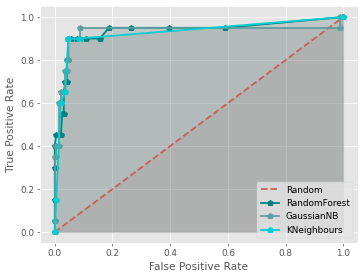

AUROC:
  - Random: 0.5000
  - Random Forest: 0.9355
  - GaussianNB: 0.9313
  - KNeighbours: 0.9277


In [ ]:
#Importe de Variables ROC

#Definición de Colores:
colors = ['indianred', 'darkslategrey', 'teal', 'cadetblue', 'darkturquoise']

#Probabilidad de Predicción Random:
prob_Random = [0 for _ in range(len(y_test))]
fpr, tpr, thresholds = roc_curve(y_test, prob_Random)
plt.plot(fpr, tpr, color=colors[0], linestyle="--", linewidth=2, label='Random')
plt.fill_between(fpr, tpr, 0, color=colors[0], alpha=0.1)

#Predicción Random Forest:
prob_RF = ClassifierRF.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, prob_RF)
plt.plot(fpr, tpr, color=colors[2], marker='p', linewidth=2, label='RandomForest')
plt.fill_between(fpr, tpr, 0, color=colors[1], alpha=0.1)

#Predicción GaussianNB:
prob_GNB = ClassifierGNB.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, prob_GNB)
plt.plot(fpr, tpr, color=colors[3], marker='p', linewidth=2, label='GaussianNB')
plt.fill_between(fpr, tpr, 0, color=colors[1], alpha=0.1)

#Predicción KNeighbours:
prob_KN = ClassifierKN.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, prob_KN)
plt.plot(fpr, tpr, color=colors[4], marker='p', linewidth=2, label='KNeighbours')
plt.fill_between(fpr, tpr, 0, color=colors[1], alpha=0.1)

#Construcción del Gráfico:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#Áreas bajo la curva ROC:
Random_AUC = roc_auc_score(y_test, prob_Random)
RF_AUC = roc_auc_score(y_test, prob_RF)
GNB_AUC = roc_auc_score(y_test, prob_GNB)
KN_AUC = roc_auc_score(y_test, prob_KN)

print("AUROC:")
print("  - Random: {:.4f}".format(Random_AUC))
print("  - Random Forest: {:.4f}".format(RF_AUC))
print("  - GaussianNB: {:.4f}".format(GNB_AUC))
print("  - KNeighbours: {:.4f}".format(KN_AUC))

In [ ]:
# Definición de Conjuntos
clasificadores = []
predicciones = []
modelos = []
cm = []

# Clasificadores:
clasificadores.append(("Random Forest", ClassifierRF))
clasificadores.append(("GaussianNB", ClassifierGNB))
clasificadores.append(("KNeighbours", ClassifierKN))

# Predicciones y respectivos Modelos:
for modelo, clasificador in clasificadores:
  predicciones.append(clasificador.predict(x_test))
  modelos.append(modelo)

# Matrices de Confusión:
for y_pred in predicciones:
  cm.append(confusion_matrix(y_test, y_pred))

# Muestreo de Matrices y nombre de los Modelos:
print("Matrices de Confusión: ")
for i in range(len(modelos)):
  print(modelos[i])
  print(cm[i], "\n")

Matrices de Confusión: 
Random Forest
[[186   6]
 [  7  13]] 

GaussianNB
[[189   3]
 [ 10  10]] 

KNeighbours
[[185   7]
 [  7  13]] 



Dados los resultados obtenidos en los puntos anteriores, se pudo determinar que el Modelo más idoneo para resolver este problema es RandomForest. Esto por como se muestran las curvas del gráfico y que los valores arrojados por las matrices de confusión, son los con mayor cantidad de acertados y menor cantidad de errores.

# **Predicciones:**

Para realizar las predicciones, se utilizará el algoritmo clasificador con mayor score dentro de los seleccionados, siendo este **RandomForest**, el cual, también es un meta-algoritmo.

Usando para la predicción los valores de:

*   Type 1
*   Type 2
*   HP
*   Attack
*   Defense
*   Sp. Atk
*   Sp. Def
*   Speed
*   Generation

Además de esto se usarán datos reales del dataset para comprobar la exactitud de los datos arrojados por las predicciones.










In [ ]:
ClassifierRF.fit(x, y)
#Charmander
pokemon = [7,0,39,52,43,60,50,65,1] #[Type 1, Type 2, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation]
pokemon = numpy.array(pokemon).reshape(1, -1)
y_pred = ClassifierRF.predict(pokemon)
result = 'Legendary' if y_pred == True else 'Not Legendary'
print(result)

Not Legendary


In [ ]:
#Cyndaquil
pokemon = [7,0,39,52,43,60,50,65,2] #[Type 1, Type 2, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation]
pokemon = numpy.array(pokemon).reshape(1, -1)
y_pred = ClassifierRF.predict(pokemon)
result = 'Legendary' if y_pred == True else 'Not Legendary'
print(result)

Not Legendary


In [ ]:
#Snorlax
pokemon = [13,0,160,10,65,65,110,30,1] #[Type 1, Type 2, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation]
pokemon = numpy.array(pokemon).reshape(1, -1)
y_pred = ClassifierRF.predict(pokemon)
result = 'Legendary' if y_pred == True else 'Not Legendary'
print(result)

Not Legendary


In [ ]:
#Xerneas
pokemon = [5,0,126,131,95,130,98,99,6] #[Type 1, Type 2, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation]
pokemon = numpy.array(pokemon).reshape(1, -1)
y_pred = ClassifierRF.predict(pokemon)
result = 'Legendary' if y_pred == True else 'Not Legendary'
print(result)

Legendary


Gracias a los resultados obtenidos, podemos concluir que, las predicciones realizadas con los datos del dataset original son acertadas, incluyendo las predicciones que se hicieron con los datos de ejemplo entregados en el documento de la tarea, que no se encuentran en el dataset.

# Conclusión:


Dentro de este cuaderno se pudo visualizar el manejo de datos de un Dataframe.

Para esto se tuvieron que manipular los datos, se hicieron transformaciones para que fueran cuantificables, además de esto, para evitar pérdida de datos, se rellenaron los valores NaN con "Ninguno", esto para poder hacerlos parte de las categorías y finalmente poder cuantificarlos.

Seguido de lo anterior se hicieron selecciones de características de los datos y una reducción de dimensionalidad.

Luego, tenemos los algoritmos clasificadores, entrenados por el conjunto de datos de entrenamiento, validados por los conjuntos de datos de testeo para finalmente realizar las predicciones. Además, se realizó un análisis de hiper-párametros con el fin de elegir los mejores parámetros para tener una predicción más acertada en el primer algoritmo seleccionado.

Para la elección del algoritmo de clasificación que efectuará las predicciones finales, realizamos las curvas ROC y las matrices de confusión, lo cual nos permiten analizar la precisión de los modelos.

Finalmente se realizaron las predicciones con el modelo que tuvo mejor score, **RandomForest**.

Para concluir, como equipo, creemos que todo este proceso es necesario para realizar predicciones correctas mediante Machine Learning, siendo de los más importantes la creación de los subconjuntos de pruebas, la selección de algoritmos de clasificación y sus hiper-parámetros.
Para complementar lo anterior, a pesar de que los meta-algoritmos tienden a ser mucho más eficientes a la hora de predecir datos, siempre será más relevante el manejo del Dataset, además del manejo de hiper-párametros, lo que nos permite acercar la ejecución del modelo a las características del dataset.

Con respecto a los modelos, dado nuestro caso, podemos decir que RandomForest, es la mejor opción para resolver las predicciones, dada su calidad de meta-algoritmo, la cantidad de parametros que posee y su alto índice de precisión.